<a href="https://colab.research.google.com/github/loicmarx/datascience-projects/blob/main/Stock_price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This program use an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict
the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price. The data used provided from the yahoo website.

In [5]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 8.2 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=a0fe8e52049cba3a04870fd9992549676626402312f1cd2d407573155fc7e2e2
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [14]:
# import the libraries
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf

In [7]:
# Get the stock quote
AAPL = yf.Ticker("AAPL")

# get stock info
AAPL.info


{'52WeekChange': 0.28518355,
 'SandP52WeekChange': 0.3087138,
 'address1': 'One Apple Park Way',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 0,
 'askSize': 2200,
 'averageDailyVolume10Day': 73715885,
 'averageVolume': 76543137,
 'averageVolume10days': 73715885,
 'beta': 1.222222,
 'beta3Year': None,
 'bid': 0,
 'bidSize': 900,
 'bookValue': 3.882,
 'category': None,
 'circulatingSupply': None,
 'city': 'Cupertino',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'currentPrice': 149.26,
 'currentRatio': 1.062,
 'dateShortInterest': 1632960000,
 'dayHigh': 149.7522,
 'dayLow': 148.12,
 'debtToEquity': 210.782,
 'dividendRate': 0.88,
 'dividendYield': 0.0058999998,
 'earningsGrowth': 1,
 'earningsQuarterlyGrowth': 0.932,
 'ebitda': 110934999040,
 'ebitdaMargins': 0.31955,
 'enterpriseToEbitda': 22.832,
 'enterpriseToRevenue': 7.296,
 'enterpriseValue': 2532822482944,
 'exDividendDate': 1628208000,
 'exchange': '

In [8]:
# get historical market data

df = yf.download("AAPL", start="2012-01-01", end="2019-12-17")

[*********************100%***********************]  1 of 1 completed


In [9]:
# Vizualise the dataframe
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.610316,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.678085,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.818833,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.952841,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.932296,394024400
...,...,...,...,...,...,...
2019-12-10,67.150002,67.517502,66.464996,67.120003,66.234123,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,66.799065,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,66.969284,137310400


In [10]:
# Get the number of raw and columns
df.shape

(2002, 6)

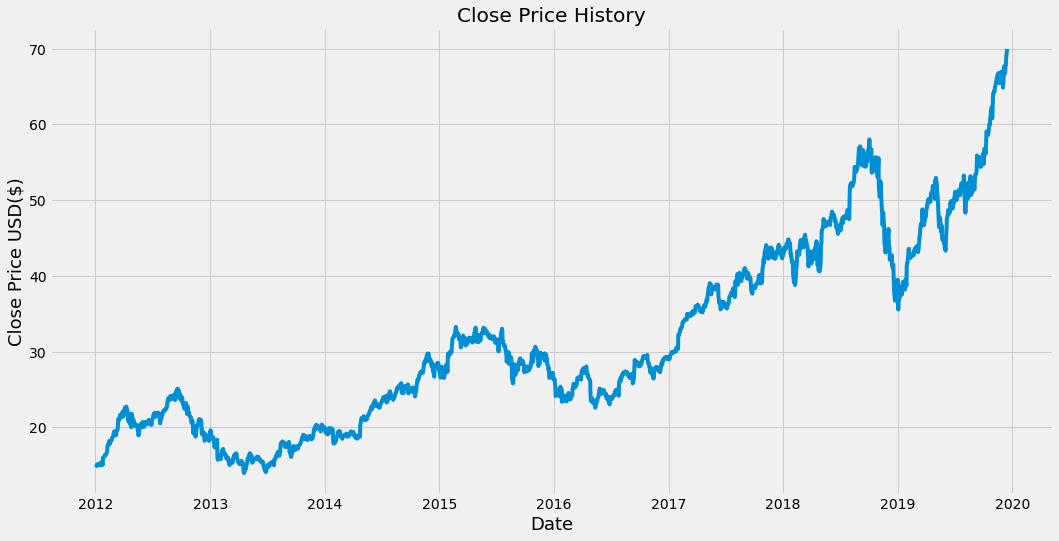

In [11]:
# Vizualise the closing price history
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18 )
plt.show()

In [12]:
# Create a new dataframe only with "Close" Column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array 
dataset = data.values
# Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset)* .8) # math.ceil to round the value

training_data_len  

1602

In [13]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0131974 ],
       [0.01460639],
       [0.01753278],
       ...,
       [0.96251174],
       [0.97897982],
       [1.        ]])

In [16]:
# Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train data sets
X_train = []
y_train = []

for i in range (60, len(train_data)):
  X_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(X_train)
    print(y_train)
    print()

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.01898002, 0.02351306, 0.01905016,
       0.03578601, 0.03449178, 0.0361813 , 0.03983449, 0.0420468 ,
       0.04186191, 0.04117973, 0.04408699, 0.04682209, 0.04992063,
       0.05492545, 0.06543874, 0.06559812, 0.0714509 , 0.07582451,
       0.06830775, 0.07120224, 0.07114487, 0.07926096, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.0923691 , 0.0968511 ,
       0.09814534, 0.09859802, 0.09093461, 0.08908567, 0.08935984,
       0.09656423, 0.09859166, 0.10294617, 0.1132108 , 0.12690551,
       0.12434252, 0.12434889, 0.13425015, 0.13734869, 0.13514271,
       0.13312806, 0.13103049, 0.13799896, 0.14278065, 0.14478257])]
[0.139835129205152]

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.0189

In [17]:
# Convert the X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)


In [19]:
# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # 1 correspond to the Features closing price
X_train.shape 

(1542, 60, 1)

In [21]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (X_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [22]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [23]:
# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)

1542/1542 [==============================] - 42s 25ms/step - loss: 6.8983e-04


In [25]:
# Create the testing data set
# Create a new arrays containing scaled values from index 1542 to 2002
test_data = scaled_data[training_data_len -60: , :]
#Create the data sets X_test and y_test 
X_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60:i, 0])

In [26]:
# Convert data to a numpy array
X_test = np.array(X_test) 

In [27]:
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [28]:
# Get the models predicted price values
predictions = model.predict(X_test)
#Inverse transform the data 
predictions = scaler.inverse_transform(predictions) # predictions to contain the same value that our y dataset contains 


In [33]:
# Get the root mean squared error (RMSE) : how accurate the model predicts the response
rmse = np.sqrt( np.mean( predictions - y_test)**2 )
rmse

0.447880802154541

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


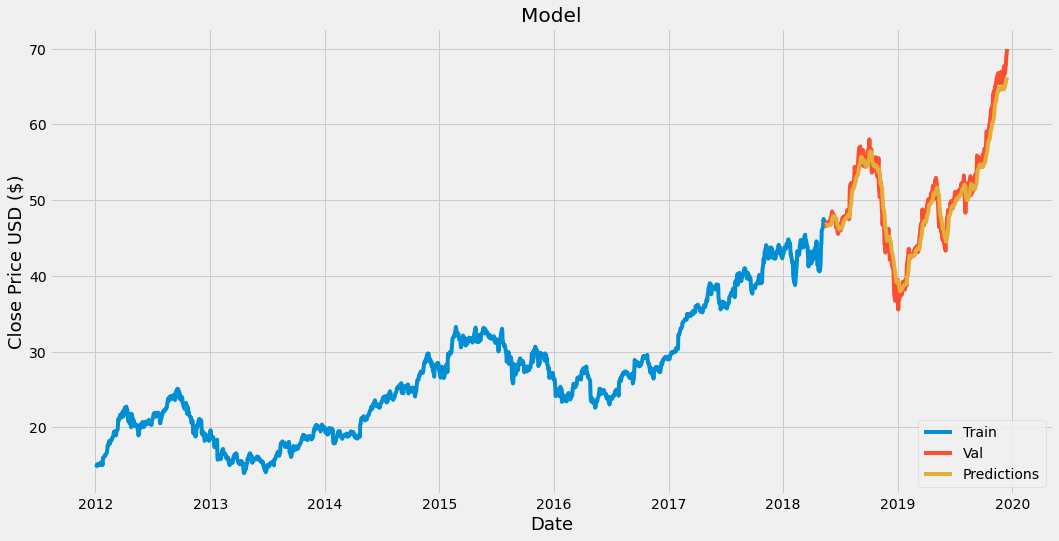

In [35]:
# Plot the data 
train = data[:training_data_len] # from index to training_data_len
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [36]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-16,47.044998,46.745850
2018-05-17,46.747501,46.774750
2018-05-18,46.577499,46.738998
2018-05-21,46.907501,46.656239
2018-05-22,46.790001,46.621239
...,...,...
2019-12-10,67.120003,65.138344
2019-12-11,67.692497,65.341141
2019-12-12,67.864998,65.600861


In [37]:
# Predict the apple stock for 17 December 2019
apple_quote = df

# Create a new dataframe
new_df = apple_quote.filter(['Close'])
# GEt the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values # contains the last 60 values
#Scale the data to be values betwwen 0 and 1 
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
x_test = []
#Append the past 60 days
x_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
x_test = np.array(x_test)
#Reshape the data to be 3Dimensional
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#Get the predicted scaled price 
pred_price = model.predict(x_test)
#undo the scalling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[66.759125]]


In [41]:


#Get the quote and show actual price on Dec 18 2019
apple_quote2 = yf.download("AAPL", data_source="yahoo", start="2019-12-17", end="2019-12-19")
print(apple_quote2['Close'])



[*********************100%***********************]  1 of 1 completed
Date
2019-12-17    70.102501
2019-12-18    69.934998
Name: Close, dtype: float64
